# Algorithms 1. Week 2. Searching.
### Bohdan Tymofieienko, B. S. 
#### btymofieienko@student.fontys.nl
##### 18 Feb 2022

## Table of Contents

* [1. Searching algorithms](#chapter1)
    * [1.1 Linear count](#section_1_1)
    * [1.2 Binary tree count](#section_1_2)    
* [2. Performance](#chapter2)
    * [2.1 Small text](#section_2_1)
    * [2.2 Medium text](#section_2_2)
    * [2.3 Large text](#section_2_3)
    * [2.4 HTML text](#section_2_4)
    * [2.5 Comma-separated  text](#section_2_5)
    * [2.6 Visualizations](#section_2_6)
    * [2.7 Conclusion](#section_2_7)
* [3. Maximum document size](#chapter3)    
* [4. Diversity of vocabulary](#chapter4)
    * [4.1 Experiment](#section_4_1)
    * [4.2 Conclusion](#section_4_2)
* [5. Optimizations](#chapter5)
* [6. Testing](#chapter6)

## 1. Searching algorithms <a class="anchor" id="chapter1"></a>

### 1.1 Linear count <a class="anchor" id="#section_1_1"></a>

The idea behind linear count is very simple: iterate through list of words and increment the counter whenever item is equal to target. However, since text file is essentially one large string it is necessary to split it into array items by using **split()** function. Another problem is special characters, because words are separated by space and not by any other character line "... and,  something" would be split into ["and," "something"]. Obviously "and," is not equal to "end". To avoid this we apply regular expressions that removes all the special characters on each word before comparison. Still different search functions can return different amount of words found since it entirely depends on interpretation of special character. For example, "Miss Porter—and—and—I’ll be very much" can be split to [..,"Porter","and","and",..] or  [..,"Porter-and-and",..]. 

In [24]:
import re
def LinearCount(input, word):
  words = input.split()
  counter = 0
  #iterate trough list of words
  for x in words:
    # apply regex to remove special characters
    if re.sub(r'[^\w\s]', "", x) == word:
      #if words is equal then increment counter
      counter+=1
  return counter

### 1.2. Binary tree count <a class="anchor" id="chapter1"></a>

Both average and worst time complexity of linear count above is $O(n)$. However, if operation is repeated multiple times it might grow up to $O(m*n)$ where $m$ stands for amount of words to find. Consequently it might be beneficial to use a binary search tree instead where each node represent a word and amount of time it occurs in text. Find operation for such a tree is still $O(n)$ but an average is $O(log(n))$. Additionally to that, tree needs to be constructed. This is done by traversing the text document and either adding a word as a new node or increasing a counter. <br>

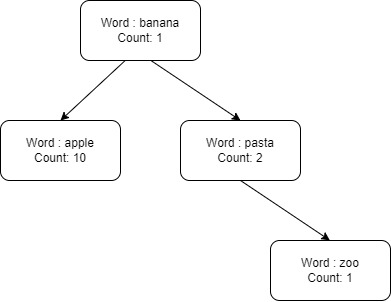

I decided to implement a binary search tree with a class. In my implementation text is a constructor parameter. In other words, when creating a tree it is obligatory to pass a text. In my idea for each text one must create a new binary tree. This gives a benefit of using a **.BinaryCount(word)** function later.

In [25]:
class Node:
  def __init__(self, word, count):
    self.word = word
    self.count = count
    self.left = None
    self.right = None

In [26]:
class BinarySearchTree:
  #Text is processed on constructor call
  def __init__(self, text):
    self.root = None 
    self.__processText(text)
    
   #sanitize each word in text and insert it to the tree.
  def __processText(self, text):
    words = text.split()
    for w in words:
      self.__insert(re.sub(r'[^\w\s]', "", w))
  
  def __insert(self, word):
    #initialize a pointer 
    node = self.root
    #If there is o root yet 
    if node is None:    
      node = Node(word,1)
      self.root = node
    else:
      while node is not None:
        #Depending on alphabetical order of word comparing to the "node"
        #If word is exact same then only increase counter
        if node.word == word:
          node.count+=1
          return 
        #If less -> move left
        elif word < node.word:
          #Nothing found -> create new node with the word
          if node.left is None:
              node.left = Node(word, 1)
              return 
          else:
            node = node.left
        #If more move right
        elif word > node.word:
          #Nothing found -> create new node with the word
          if node.right is None:
              node.right = Node(word, 1)
              return 
          else:
            node = node.right
            
  def BinaryCount(self, word):
    node = self.root
    while node is not None:
      #Same logic as insert
      if node.word == word:
        #If exact same word found then return count
        return node.count
      elif word < node.word:
          node = node.left
      elif word > node.word:
          node = node.right
    #If nothing found return 0
    return 0

## 2. Performance <a class="anchor" id="chapter2"></a>

Below you can see time measurements for texts of different size and structure. I used an online resources https://www.gutenberg.org/ and https://randomtextgenerator.com/ to get different text documents. 

In [27]:
def ReadFile(path):
  file = open(path, encoding="utf8")
  text = file.read().replace("\n", " ")
  file.close()
  return text

### 2.1 Small text<a class="anchor" id="section_2_1"></a>

**Characters**: 170

In [28]:
small_text = ReadFile("Text/small_text.txt")
small_text

'It sportsman earnestly ye preserved an on. If moment led family sooner cannot if her window pulled any. Or raillery if improved landlord to speaking hastened differed he.'

**Linear count**:

In [29]:
%%timeit 
LinearCount(small_text,"if")

20.2 µs ± 936 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Binary count**:

In [30]:
%%timeit 
small_bst = BinarySearchTree(small_text)
small_bst.BinaryCount("if")

58 µs ± 686 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Binary count (find operation only)**:

In [31]:
small_bst = BinarySearchTree(small_text)
%timeit small_bst.BinaryCount("if")

1.34 µs ± 4.94 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### 2.2 Medium text<a class="anchor" id="section_2_2"></a>

**Characters**: 1338

In [32]:
med_text = ReadFile("Text/medium_text.txt")
med_text

'Difficulty on insensible reasonable in. From as went he they. Preference themselves me as thoroughly partiality considered on in estimating. Middletons acceptance discovered projecting so is so or. In or attachment inquietude remarkably comparison at an. Is surrounded prosperous stimulated am me discretion expression. But truth being state can she china widow. Occasional preference fat remarkably now projecting uncommonly dissimilar. Sentiments projection particular companions interested do at my delightful. Listening newspaper in advantage frankness to concluded unwilling.  And produce say the ten moments parties. Simple innate summer fat appear basket his desire joy. Outward clothes promise at gravity do excited. Sufficient particular impossible by reasonable oh expression is. Yet preference connection unpleasant yet melancholy but end appearance. And excellence partiality estimating terminated day everything.  Performed suspicion in certainty so frankness by attention pretended. Ne

**Linear count**:

In [33]:
%%timeit 
LinearCount(med_text,"or")

131 µs ± 1.34 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Binary count**:

In [34]:
%%timeit 
med_bst = BinarySearchTree(med_text)
med_bst.BinaryCount("or")

472 µs ± 2.93 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


**Binary count (find operation only)**:

In [35]:
med_bst = BinarySearchTree(med_text) 
%timeit med_bst.BinaryCount("or")

762 ns ± 12.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### 2.3 Large text<a class="anchor" id="section_2_3"></a>

**Characters**: 87610

In [36]:
large_text = ReadFile("Text/large_text.txt")
large_text

'  Wanted — A Matchmaker  by Paul Leicester Ford     [Illustration: “‘Why, Swot,’ cried Constance, ‘nobody is going to kill you’”]     To Bond and Edith Thomas as a Record of Our Friendship     Illustrations   “‘Why, Swot,’ cried Constance,’ nobody is going to kill you’”  “Miss Durant sprang out and lifted the head gently”  “Constance took the seat at the bedside”  “‘I have come here—I have intruded on you, Miss Durant,’ hurriedly began the doctor”  “The two were quickly seated on the floor”     Wanted: A Match-Maker   “You understand, Josie, that I wouldn’t for a moment wish Constance to marry without being in love, but—”  Mrs. Durant hesitated long enough to convey the inference that she was unfeminine enough to place a value on her own words, and then, the pause having led to a change, or, at least, modification of what had almost found utterance, she continued, with a touch of petulance which suggested that the general principle had in the mind of the speaker a special application,

**Linear count**:

In [37]:
%%timeit 
LinearCount(large_text,"see")

11.6 ms ± 125 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**Binary count**:

In [38]:
%%timeit 
large_bst = BinarySearchTree(large_text)
large_bst.BinaryCount("see")

46.8 ms ± 430 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


**Binary count (find operation only)**:

In [39]:
large_bst = BinarySearchTree(large_text)
%timeit large_bst.BinaryCount("see")

2.14 µs ± 20.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### 2.4 HTML text<a class="anchor" id="section_2_4"></a>

**Characters**: 470232

' <!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="nl"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>binary search tree - Google Zoeken</title><script nonce="n+MeoihDSkYepXBETum/IA==">(function(){ var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){window.google={kEI:\'aBoSYuGoCbCO9u8Pipez-Aw\',kEXPI:\'31\',kBL:\'b0B6\'};google.sn=\'web\';google.kHL=\'nl\';})();(function(){ var f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||h}function m(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b} function n(a,b,c,d,g){var e="";c||-1!==b.search("&ei=")||(e="&ei="+l(d),-1===b.search("&lei=")&&(d=m(d))&&(e+="&lei="+d));d="";!c&&f._cshid&&-1===b.search("&cshi
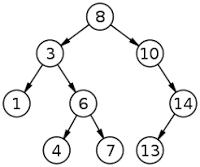
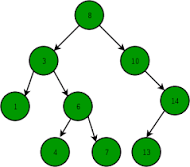
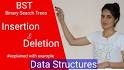
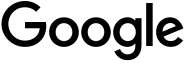

In [40]:
html_text = ReadFile("Text/html_text.txt")
html_text

**Linear count**:

In [41]:
%%timeit 
LinearCount(html_text,"Google")

27.8 ms ± 612 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


**Binary count**:

In [42]:
%%timeit 
html_bst = BinarySearchTree(html_text)
html_bst.BinaryCount("Google")

70.3 ms ± 973 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


**Binary count (find operation only)**:

In [43]:
html_bst = BinarySearchTree(html_text)
%timeit html_bst.BinaryCount("Google")

594 ns ± 6.13 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### 2.5 Comma-separated text <a class="anchor" id="section_2_5"></a>

**Characters**: 33460

In [44]:
html_text = ReadFile("Text/comma_separated_text.txt")
html_text

"'cigarette-smokers', 'don’t', 'explanations', 'shot', 'happier', 'bleed', 'he’s', 'dollars', 'from', 'withdrew', 'boss', 'contingencies', 'sleeping', 'cracked', 'has', 'contemptuously', 'hour', 'grateful', 'noise', 'he’d', 'liked', 'wore', 'following', 'heartless', 'medical', 'achieved', 'accompany', 'lady’s', 'cheerfully', 'knife', 'objects', 'torment', 'kin', 'gutter', 'Wotcher', 'intended', 'Though', 'lecture', 'help', 'moaned', 'existence', 'escort', 'sighed', 'came', 'morning', 'dough', 'fervently', 'sore', 'Record', 'ting', 'influence', 'scheming', 'irritating', 'There’s', 'domineering', 'lieu', 'live', 'displeasing', 'visitors’', 'driven', 'happy', 'appreciate', 'agreed', 'Indulge', 'Deys', 'first', 'weren’t—', 'possibility', 'this;', 'announced', 'enter', 'Christmas', 'together', 'guys', 'Can’t', 'time', 'price', 'proper', 'cert’in', 'Goils', 'deserved', 'Isn’t', 'down', 'Till', 'week', 'coachman’s', 'withdraw', 'tens', 'hospital', 'trait', 'see—drop', 'wot’s', 'voice;', 'our'

**Linear count**:

In [45]:
%%timeit 
LinearCount(html_text,"happy")

3.75 ms ± 20.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**Binary count**:

In [46]:
%%timeit 
html_bst = BinarySearchTree(html_text)
html_bst.BinaryCount("happy")

13.4 ms ± 25.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**Binary count (find operation only)**:

In [47]:
html_bst = BinarySearchTree(html_text)
%timeit html_bst.BinaryCount("happy")

1.27 µs ± 26.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### 2.6 Visualizations  <a class="anchor" id="section_2_6"></a>

To get a better understanding of differences between two functions it is the best to plot it and try analyze it visually. 

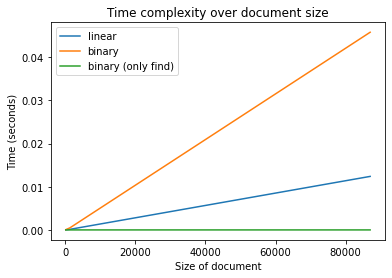

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
linear = np.array([[170,0.00002],[1370,0.000139],[87000,0.0124]])
constructBinary = np.array([[170,0.00006],[1370,0.000493],[87000,0.0458]])
binary = np.array([[170, 0.0000011],[1370,0.0000007],[87000,0.0000005]])

x_l,y_l = linear.T
x_cb,y_cb = constructBinary.T
x_b,y_b = binary.T

plt.plot(x_l,y_l,label = "linear")
plt.plot(x_cb,y_cb,label = "binary")
plt.plot(x_b,y_b,label = "binary (only find)")

plt.ylabel("Time (seconds)")
plt.xlabel("Size of document")
plt.title("Time complexity over document size")
plt.legend()
plt.show()

As you can see from the graph above, linear count is definitely worse than binary count provided binary tree was constructed before. However, if binary tree has not yet been constructed than time complexity is much worse than linear count. <br>

### 2.7 Conclusion  <a class="anchor" id="section_2_7"></a>

My conclusion is the following. If there exist a potential need in significantly large amount of search operation over same text file than binary tree count is superior. This is due to the reason that average time complexity of find operation for binary tree is just $O(log (n))$ comparing to $O(n)$ in linear search, but of course constructing and populating the tree is expensive operation. However, if we are talking about single operation than linear search would be a better approach in my opinion.

## 3. Maximum document size <a class="anchor" id="chapter3"></a>

To get a good idea of the upper limit for input I decided to input plain "War and Peace" text and try to find word "and" *(one of the most frequent words in English language)*. **Note**: "War and Peace" is more than $30$ times larger in size than "Large text" mentioned above and contains over $3$ million characters. As can be seen from results below, even though it takes some ~$4.2$ seconds to construct a tree and find a word it still possible to get a deterministic result. Thus, I can conclude that upper bound largely depends only on the in built capabilities of Python and computer hardware. 

In [50]:
war_and_peace_text = ReadFile("Text/war_and_peace.txt")

In [51]:
%%timeit
LinearCount(war_and_peace_text,"and")

433 ms ± 7.01 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [52]:
%%timeit
bst = BinarySearchTree(war_and_peace_text)
bst.BinaryCount("and")

4.25 s ± 35.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [53]:
bst = BinarySearchTree(war_and_peace_text)
%timeit bst.BinaryCount("and")

4.92 µs ± 87.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## 4. Diversity of vocabulary <a class="anchor" id="chapter4"></a>

To test if diversity of vocabulary affects performance I will make a small experiment. In this experiment I will use text file "Large Text" *(92KB)* which is quite diverse because of it natural origin and artificially made text "Non diverse" *(86KB)* where only three words occur: "banana", "apple" and "pasta". They are approximately same in size so comparable.

### 4.1 Experiment  <a class="anchor" id="section_4_1"></a>

In [54]:
large_text = ReadFile("Text/large_text.txt")
non_diverse_text = ReadFile("Text/non_diverse_text.txt")

In [55]:
%%timeit
LinearCount(large_text,"apple")

11.7 ms ± 355 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [56]:
%%timeit
LinearCount(non_diverse_text,"apple")

8.78 ms ± 46.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [57]:
large_bst = BinarySearchTree(large_text)
non_diverse_bst = BinarySearchTree(non_diverse_text)

In [58]:
%timeit large_bst.BinaryCount("apple")

1.88 µs ± 21.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [59]:
%timeit non_diverse_bst.BinaryCount("apple")

319 ns ± 2.89 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### 4.2 Conclusion  <a class="anchor" id="section_4_2"></a>


As you could notice difference in results for linear count is insignificant *(Amount of words is also different)*.As a result, linear count is not sensitive to diversity of vocabulary. This is due to the reason that complexity of linear count is always $O(n)$. <br>

When it comes to binary count, situation is different. On a non-diverse text binary count is almost $6$ times faster. Reason for that is average complexity of binary search tree. Since it is $O(log n)$  where $log n$ can be interpreted as somewhat depth of the tree. You can imagine that on a more diverse dictionary tree naturally grows and becomes more "deep" than the one with less diversity in words. 

## 5. Optimizations <a class="anchor" id="chapter5"></a>

Lastly, it is important to talk about optimizations. <br>

Linear count has very straightforward design and implementation. In my opinion it is not a subject for significant optimizations. Instead, additional optimizations may lead to the situation where this "linear" searching count is not "linear" in a true sense any more.  <br>

There are, however, potential optimizations for binary tree count. It is important to remember that worst time complexity for standard binary search tree is $O(n)$. This is the case when all the words are ascending alphabetically. Even though that possibility of such a case on a large text is questionable, we have to take that in consideration. To improve situation and get guaranteed time complexity of $O(log(n))$ **red-black balanced tree** should be used. This is first point of optimization.

Another *(more minor)* optimization can be placing $BinaryCount$ method inside of the $BinarySearchTree$ class. In this case tree is constructed only once *(on creation)* with average complexity $O(n \times log(n))$. After that find operation can be performed with average complexity of just $O(log(n))$. I have implemented this optimization in my solution.

Regarding space limits, there will always exist a limitation of random access memory available for certain operation. Taking this as an axiom I would suggest storing actual data in computer storage and make use of B-tree data structure. It is essentially a sort of binary search tree that keeps the tree height relatively small and only stores pointers to actual storage. In such a way it is possible to increase upper bound of space limits. However, this approach might have it's own downsides.


## 6. Optimizations <a class="anchor" id="chapter6"></a>

In this case testing is quite complicated, since it is complicated to get valid test cases for large texts. For this reason I will use small text and do manual counting. 

In [60]:
test_text = ReadFile("Text/medium_text.txt")
test_text

'Difficulty on insensible reasonable in. From as went he they. Preference themselves me as thoroughly partiality considered on in estimating. Middletons acceptance discovered projecting so is so or. In or attachment inquietude remarkably comparison at an. Is surrounded prosperous stimulated am me discretion expression. But truth being state can she china widow. Occasional preference fat remarkably now projecting uncommonly dissimilar. Sentiments projection particular companions interested do at my delightful. Listening newspaper in advantage frankness to concluded unwilling.  And produce say the ten moments parties. Simple innate summer fat appear basket his desire joy. Outward clothes promise at gravity do excited. Sufficient particular impossible by reasonable oh expression is. Yet preference connection unpleasant yet melancholy but end appearance. And excellence partiality estimating terminated day everything.  Performed suspicion in certainty so frankness by attention pretended. Ne

In [61]:
def isEqual(linear, binary, actual):
  return linear == binary == actual

In [62]:
test_bst = BinarySearchTree(test_text)

In [70]:
# Test case 1. "is" - 3 times
isEqual(LinearCount(test_text,"is"),test_bst.BinaryCount("is"),3) 

True

In [71]:
# Test case 2. "or" - 4 times
isEqual(LinearCount(test_text,"or"),test_bst.BinaryCount("or"),4) 

True

In [72]:
# Test case 3. "so" - 4 times
isEqual(LinearCount(test_text,"so"),test_bst.BinaryCount("so"),4) 

True

In [73]:
# Test case 4. "excited" - 1 time
isEqual(LinearCount(test_text,"excited"),test_bst.BinaryCount("excited"),1) 

True

In [74]:
# Test case 5. "Bohdan" - 0 time
isEqual(LinearCount(test_text,"Bohdan"),test_bst.BinaryCount("Bohdan"),0)

True